In [8]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential

max_features = 10000
maxlen = 500
batch_size = 32

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)


len(x_train), len(x_test)

(25000, 25000)

In [4]:
from keras.layers import Dense, LSTM, Embedding, Dropout, SimpleRNN
from keras.models import Sequential



model = Sequential()
model.add(Embedding(max_features, 32, input_length=maxlen))
model.add(SimpleRNN(32, return_sequences=True))
model.add(Dropout(0.5))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


/Users/gw/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 28s 135ms/step - accuracy: 0.5789 - loss: 0.6613 - val_accuracy: 0.8126 - val_loss: 0.4430
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 136ms/step - accuracy: 0.8309 - loss: 0.3959 - val_accuracy: 0.8365 - val_loss: 0.3878
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 136ms/step - accuracy: 0.8845 - loss: 0.2946 - val_accuracy: 0.8360 - val_loss: 0.3874
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 137ms/step - accuracy: 0.9266 - loss: 0.2034 - val_accuracy: 0.8317 - val_loss: 0.4157
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 136ms/step - accuracy: 0.8204 - loss: 0.3897 - val_accuracy: 0.8350 - val_loss: 0.4477
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 137ms/step - accuracy: 0.9612 - loss: 0.1099 - val_accuracy: 0.8068 - val_loss: 0.5781
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 136ms/step - accuracy: 0.9818 - loss: 0.0586 - val_accuracy: 0.7993 - val_loss: 0.6789
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 136ms/step - accuracy: 0.9914 - loss: 0

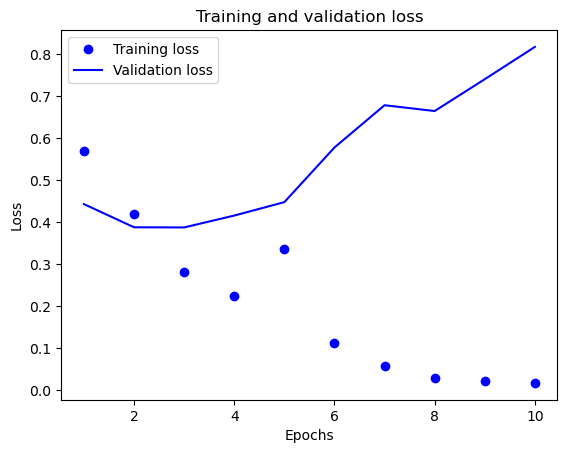

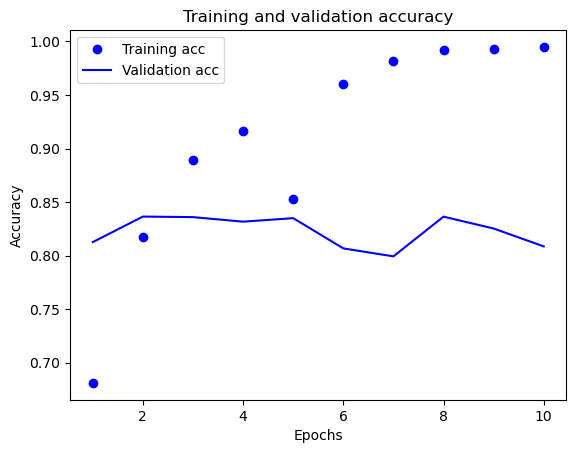

In [6]:
import matplotlib.pyplot as plt


loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()